In [1]:
#Q14.Train an AdaBoost Classifier on a sample dataset and print model accuracy.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a sample dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 83.67%


In [2]:
#Q15.Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Create a sample regression dataset
X, y = make_regression(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    noise=0.2,
    random_state=42
)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate performance
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 110.72


                    Feature  Importance
7       mean concave points    0.434897
27     worst concave points    0.273841
22          worst perimeter    0.050974
23               worst area    0.047995
21            worst texture    0.047193
20             worst radius    0.045435
26          worst concavity    0.022999
1              mean texture    0.018393
16          concavity error    0.015558
10             radius error    0.010003
13               area error    0.005478
24         worst smoothness    0.004507
15        compactness error    0.004384
17     concave points error    0.003404
12          perimeter error    0.002045
18           symmetry error    0.001845
5          mean compactness    0.001712
11            texture error    0.001303
28           worst symmetry    0.001284
6            mean concavity    0.001199
29  worst fractal dimension    0.001087
25        worst compactness    0.001012
4           mean smoothness    0.000926
9    mean fractal dimension    0.000678


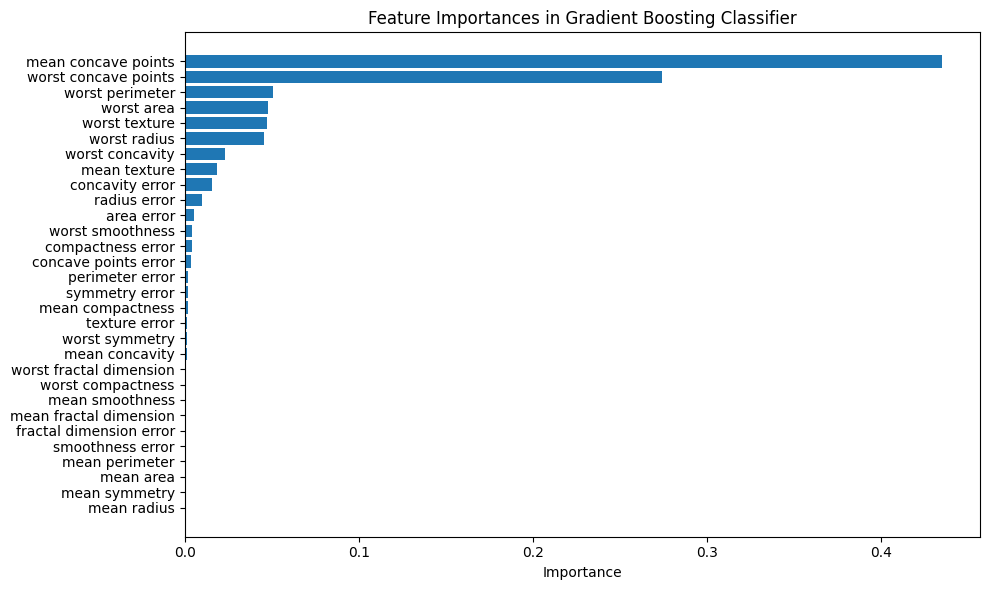

In [3]:
#Q16.Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance4

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get and display feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Optional: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances in Gradient Boosting Classifier')
plt.tight_layout()
plt.show()


In [4]:
#Q17.Train a Gradient Boosting Regressor and evaluate using R-Squared Score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Create a sample regression dataset
X, y = make_regression(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    noise=0.3,
    random_state=42
)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate using R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R-squared Score: {r2:.4f}")


R-squared Score: 0.8196


In [5]:
#Q18.Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_preds)

# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

# Print accuracies
print(f"Gradient Boosting Accuracy: {gb_accuracy * 100:.2f}%")
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:41:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 95.91%
XGBoost Accuracy: 97.08%


In [ ]:
#Q19.Train a CatBoost Classifier and evaluate using F1-Score

# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load a sample dataset (Iris)
data = load_iris()
X = data.data
y = data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using F1-Score (macro for multiclass)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1-Score (macro): {f1:.4f}")


In [8]:
#Q20.Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

# Import necessary libraries
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=4, n_estimators=500)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.20484014861251143


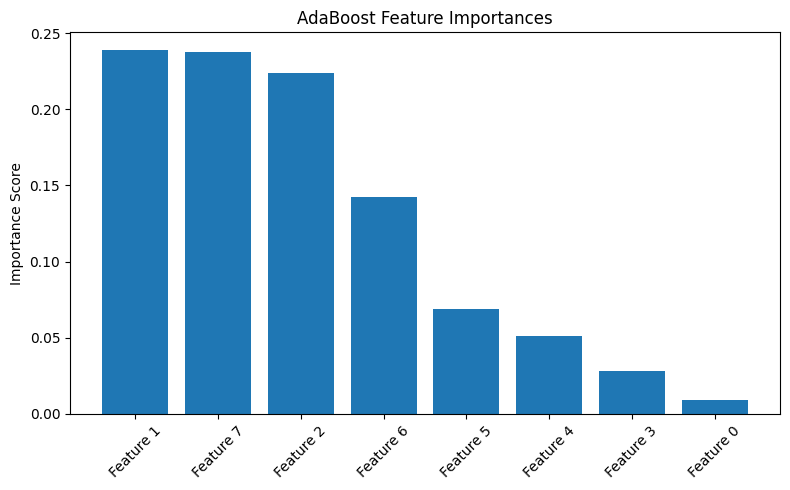

In [10]:
#Q21. Train an AdaBoost Classifier and visualize feature importance

# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=8, n_informative=5, n_redundant=0, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier
clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Visualize feature importances
feature_names = [f"Feature {i}" for i in range(X.shape[1])]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("AdaBoost Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


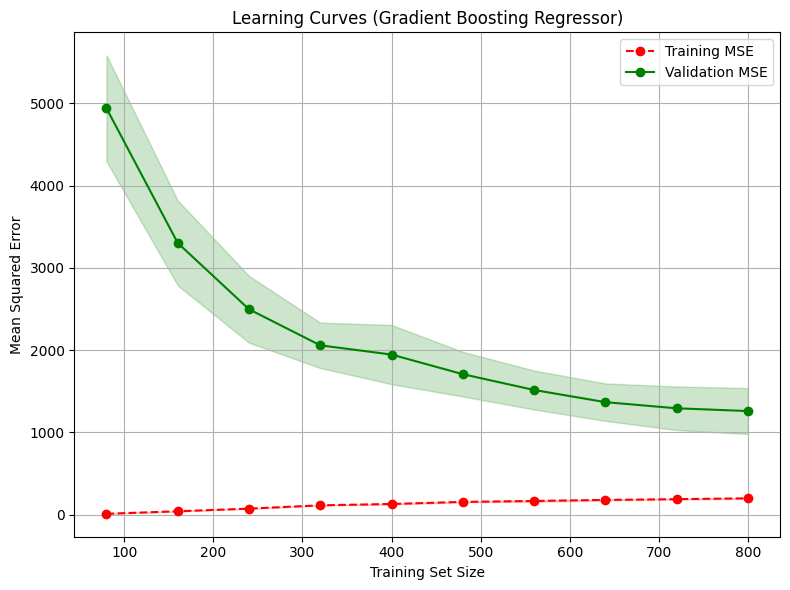

In [11]:
#Q22.Train a Gradient Boosting Regressor and plot learning curves

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve

# Generate a regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

# Define the regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=gbr,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error'
)

# Convert negative MSE to positive
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o--', color='r', label='Training MSE')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation MSE')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color='g')
plt.title('Learning Curves (Gradient Boosting Regressor)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:47:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


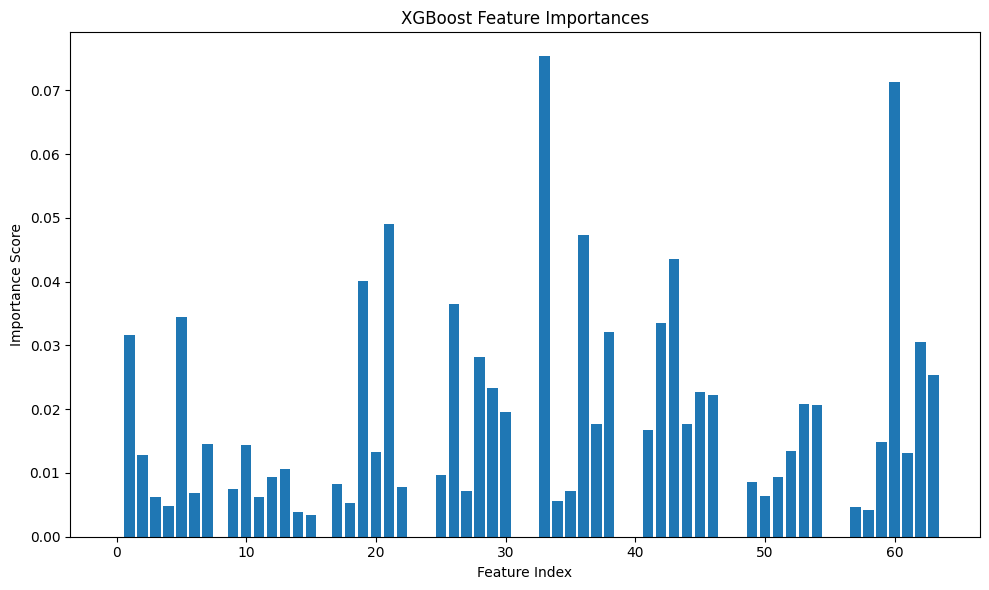

In [13]:
#Q23.Train an XGBoost Classifier and visualize feature importance

from xgboost import XGBClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the digits dataset (multiclass classification)
digits = load_digits()
X, y = digits.data, digits.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize and train the XGBoost classifier
clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
clf.fit(X_train, y_train)

# Visualize feature importance
plt.figure(figsize=(10, 6))
xgb_importances = clf.feature_importances_
plt.bar(range(len(xgb_importances)), xgb_importances)
plt.title('XGBoost Feature Importances')
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()


In [ ]:
#Q24.Train a CatBoost Classifier and plot the confusion matrix

from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, n_classes=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train CatBoostClassifier
model = CatBoostClassifier(iterations=100, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("CatBoost Classifier Confusion Matrix")
plt.show()


In [ ]:
#Q25.Train an AdaBoost Classifier with different numbers of estimators and compare accuracy4

from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, n_classes=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train CatBoostClassifier
model = CatBoostClassifier(iterations=100, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("CatBoost Classifier Confusion Matrix")
plt.show()


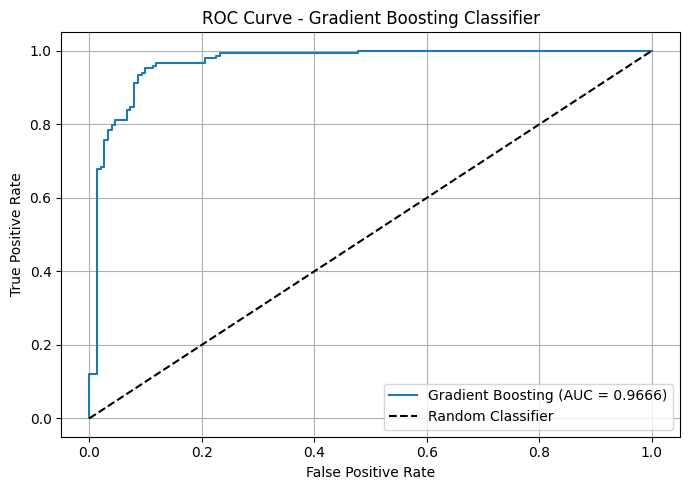

In [17]:
#Q26.Train a Gradient Boosting Classifier and visualize the ROC curve

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Gradient Boosting Classifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
#Q27.Train an XGBoost Regressor and tune the learning rate using GridSearchCV4

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Generate a regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)  # [2]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # [1]

# Define the XGBoost regressor
xgb_reg = XGBRegressor(random_state=42)

# Set up the parameter grid for learning_rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)  # [4][6]

# Best parameter and corresponding score
print("Best learning rate:", grid_search.best_params_['learning_rate'])
print("Best CV MSE:", -grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test set MSE:", test_mse)


Best learning rate: 0.1
Best CV MSE: 2147.123891385025
Test set MSE: 1519.3246734905586


In [ ]:
#Q28.Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Generate an imbalanced binary classification dataset
X, y = make_classification(
    n_samples=2000, n_features=10, n_informative=6,
    n_redundant=2, weights=[0.9, 0.1], random_state=42
)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 1. Train CatBoost without class weights
model_default = CatBoostClassifier(verbose=0, random_state=42)
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)

# 2. Train CatBoost with class weights
# Calculate scale_pos_weight as ratio of negative to positive class
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
class_weights = [1, scale_pos_weight]  # [weight for class 0, weight for class 1]
model_weighted = CatBoostClassifier(class_weights=class_weights, verbose=0, random_state=42)
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

# 3. Compare performance
print("Performance WITHOUT class weights:")
print(classification_report(y_test, y_pred_default, digits=4))

print("Performance WITH class weights:")
print(classification_report(y_test, y_pred_weighted, digits=4))


Learning Rate: 0.01, Accuracy: 0.7800
Learning Rate: 0.05, Accuracy: 0.7667
Learning Rate: 0.1, Accuracy: 0.7667
Learning Rate: 0.5, Accuracy: 0.7800
Learning Rate: 1.0, Accuracy: 0.7833
Learning Rate: 2.0, Accuracy: 0.6000


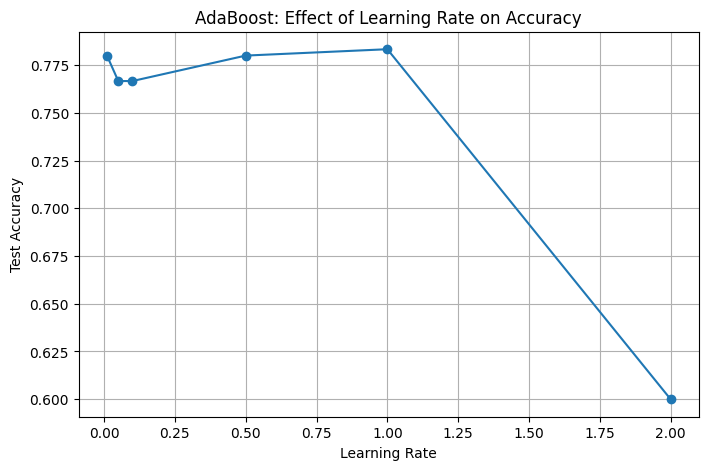

In [22]:
#Q29.Train an AdaBoost Classifier and analyze the effect of different learning rates

from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=6, n_redundant=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0, 2.0]
accuracies = []

for lr in learning_rates:
    clf = AdaBoostClassifier(n_estimators=50, learning_rate=lr, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Learning Rate: {lr}, Accuracy: {acc:.4f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.title('AdaBoost: Effect of Learning Rate on Accuracy')
plt.grid(True)
plt.show()


In [23]:
#Q30.Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

# Generate a synthetic multi-class dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    n_classes=3, random_state=1
)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize XGBoost for multi-class classification
model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    random_state=42
)
model.fit(X_train, y_train)

# Predict class probabilities
y_pred_proba = model.predict_proba(X_test)

# Calculate log-loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log-loss: {logloss:.4f}")


Log-loss: 0.5599
